In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np


In [3]:
play_styles_filepath = 'play_styles.txt'
play_styles_dictionary = {}

In [4]:
with open(play_styles_filepath, 'r') as play_styles_file:
    space = True
    act_role = None
    for line in play_styles_file:
        if space:
            styles_list = []
            act_role = line.strip()
            space = False
        elif line == '\n':
            space = True
            play_styles_dictionary[act_role] = styles_list
        else:
            line = line.strip().split(' - ')
            styles_list.append({line[0]: line[1]})
            

In [5]:
df = pd.read_csv('players_df.csv')

In [6]:
all_roles = df['Position'].unique()
all_roles

array(['Centre-Back', 'Defensive Midfield', 'Right Winger', 'Right-Back',
       'Attacking Midfield', 'Left Winger', 'Left-Back', 'Centre-Forward',
       'Central Midfield', 'Second Striker', 'Right Midfield',
       'Left Midfield'], dtype=object)

In [7]:
gk_df = pd.read_csv('goalkeepers_df.csv')
full_backs_df = df[(df['Position']=='Right-Back') | (df['Position']=='Left-Back')]
cb_df = df[df['Position']=='Centre-Back']
mid_df = df[df['Role']=='Midfielder']
wingers_df = df[(df['Position']=='Right Winger') | (df['Position']=='Left Winger')]
fw_df = df[(df['Position']=='Second Striker') | (df['Position']=='Centre-Forward')]

In [8]:
def cluster_and_show_PCA(df, features, n_clusters):
        # Filter the data to include only the relevant features
        clustering_data = df[features]

        # Handle missing values (if any)
        clustering_data = clustering_data.dropna()

        # Normalize the data
        scaler = StandardScaler()
        clustering_data_scaled = scaler.fit_transform(clustering_data)

        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(clustering_data_scaled)

        # Determine the number of clusters (k = 3 for three playstyles)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(clustering_data_scaled)

        # Add the cluster labels to the original data
        df['Cluster'] = clusters
        df['PCA1'] = pca_result[:, 0]
        df['PCA2'] = pca_result[:, 1]


        silhouette_avg = silhouette_score(clustering_data_scaled, clusters)
        print(f'Silhouette Score: {silhouette_avg}')

        cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
        cluster_df = pd.DataFrame(cluster_centers, columns=features)

        # Plot the PCA results with the cluster assignments
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df)
        plt.title('Player Clusters based on PCA')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

        df = df.drop(['PCA1', 'PCA2'], axis=1)

        variable_factor_map = pca.components_.T * np.sqrt(pca.explained_variance_)

        plt.figure(figsize=(20, 12))
        for i, var in enumerate(features):
                plt.arrow(0, 0, variable_factor_map[i, 0], variable_factor_map[i, 1], color='r', alpha=0.5)
                plt.text(variable_factor_map[i, 0] * 1.1, variable_factor_map[i, 1] * 1.1, var, color='b', ha='center', va='center', fontsize=10)
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.title('Variable Factor Map (PCA)')
        plt.grid()
        plt.show()
        return df


In [9]:
def set_style_attribute_to_map(df, map_styles):
    df['Style'] = df['Cluster'].map(map_styles)
    return df

## Goalkeepers

Silhouette Score: 0.12487483275724684


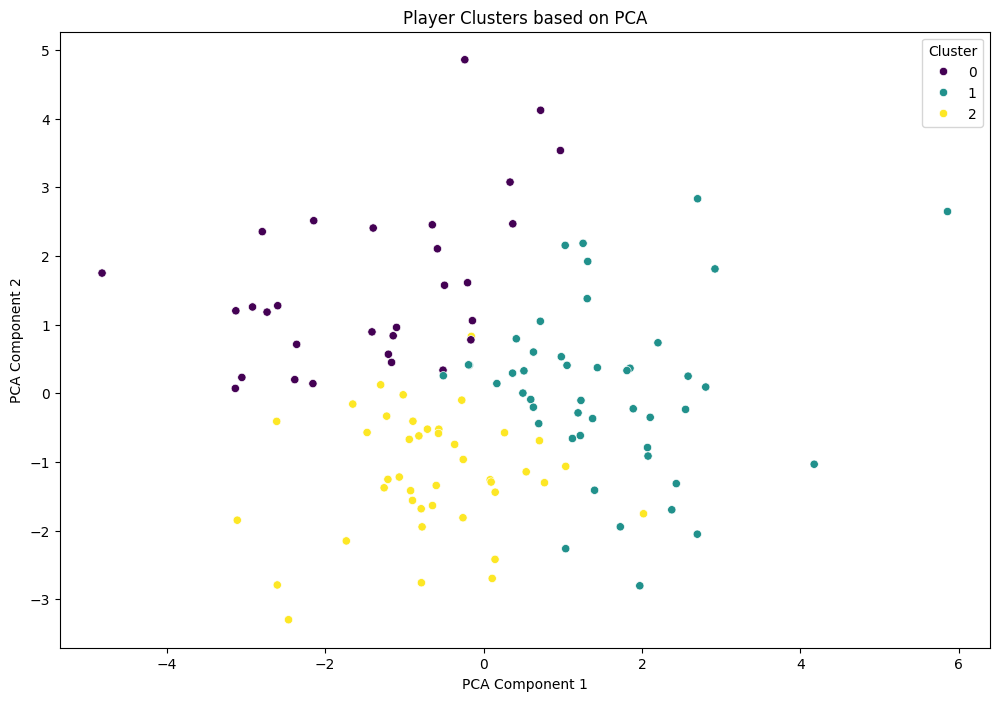

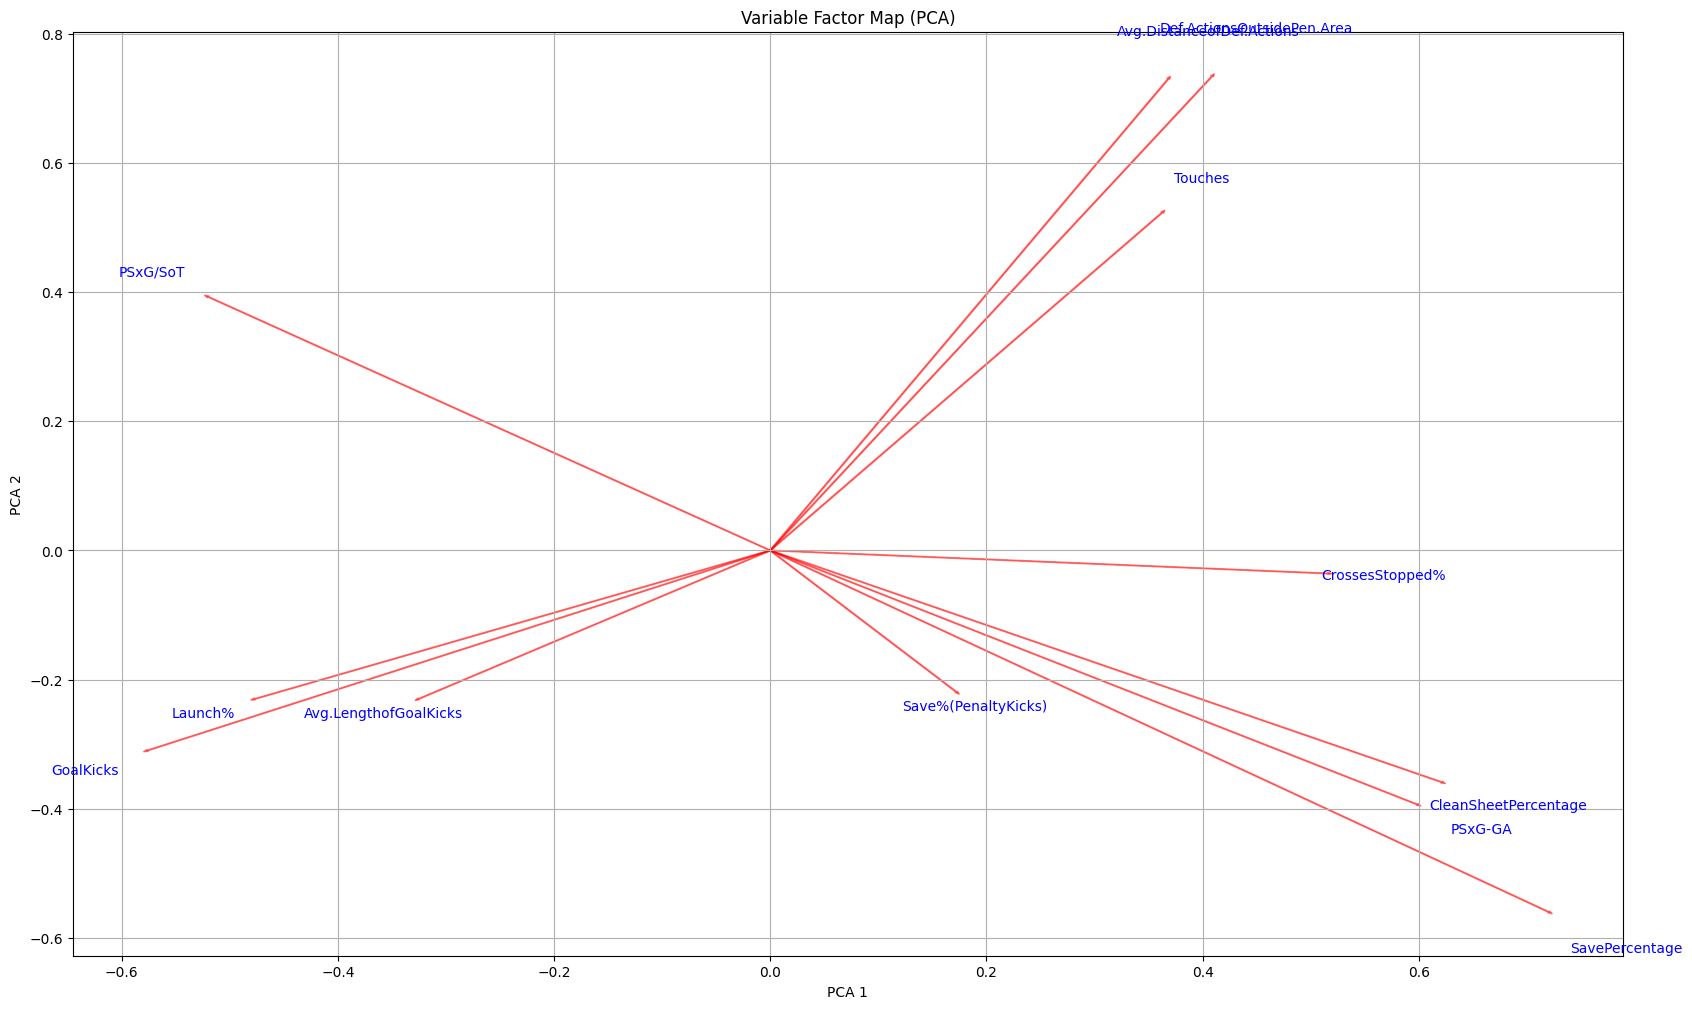

In [10]:
gk_features = ['PSxG-GA', 'SavePercentage', 'PSxG/SoT', 'Save%(PenaltyKicks)', 'Touches', 'Launch%',
'GoalKicks', 'Avg.LengthofGoalKicks', 'CrossesStopped%',
'Def.ActionsOutsidePen.Area', 'Avg.DistanceofDef.Actions', 'CleanSheetPercentage']
gk_df = cluster_and_show_PCA(gk_df, gk_features, 3)

0 = Sweeper - Avg position (high y)
1 = BallPlayer - Touches
2 = Line

In [11]:
gk_style_map = {0: 'Sweeper', 1: 'BallPlayer', 2: 'Line'}
gk_df = set_style_attribute_to_map(gk_df, gk_style_map)

## Fullbacks

In [17]:
player_features = ['Non-PenaltyGoals', 'npxG:Non-PenaltyxG', 'ShotsTotal',
       'Assists', 'xAG:Exp.AssistedGoals', 'npxG+xAG', 'Shot-CreatingActions',
       'PassesAttempted', 'PassCompletion%', 'ProgressivePasses',
       'ProgressiveCarries', 'SuccessfulTake-Ons', 'Touches(AttPen)',
       'ProgressivePassesRec', 'Tackles', 'Interceptions', 'Blocks',
       'Clearances', 'AerialsWon']

C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_result[:, 0]
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Silhouette Score: 0.23674014086096357


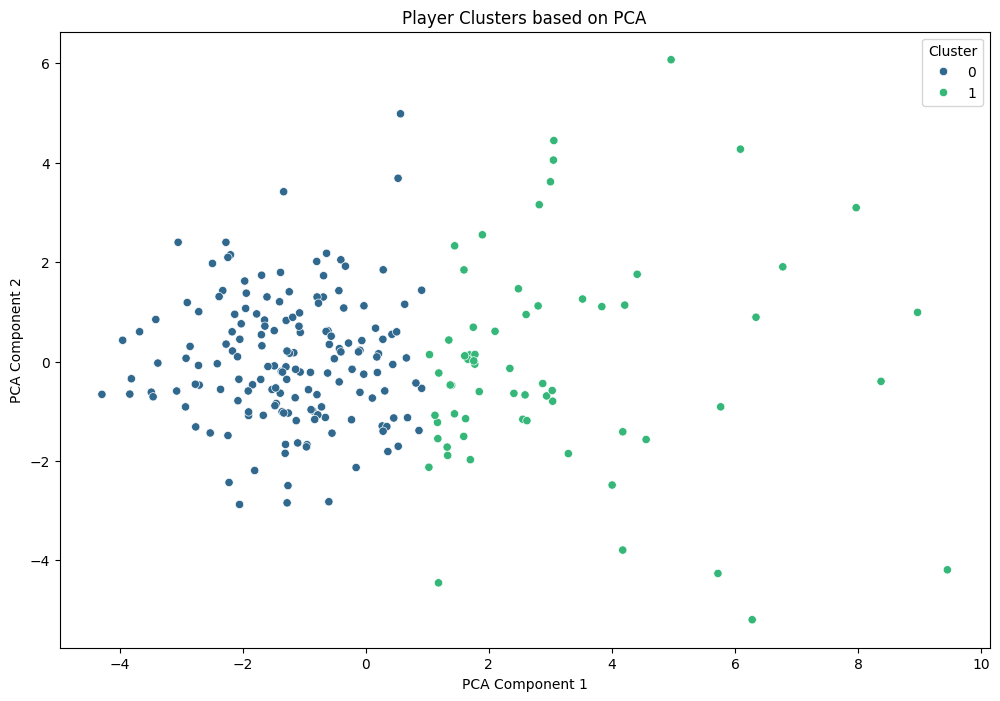

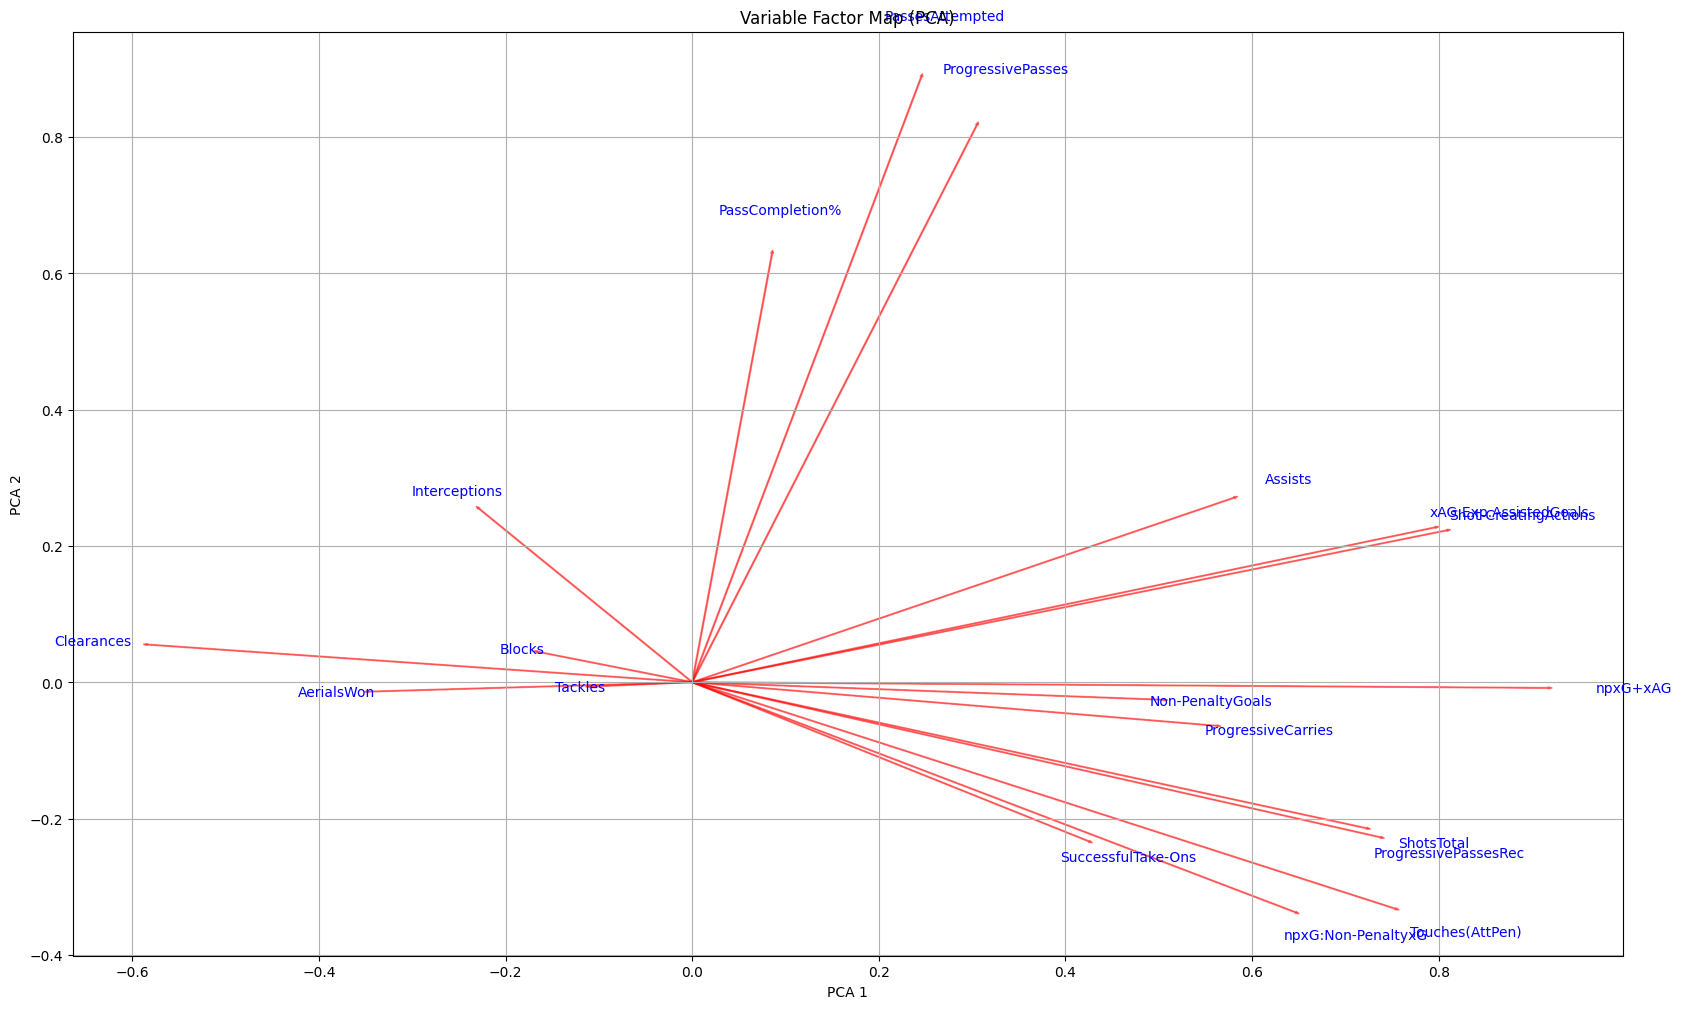

In [18]:
full_backs_df = cluster_and_show_PCA(full_backs_df, player_features, 2)

In [19]:
fb_style_map = {0: 'Defensive', 1: 'WingBacks'}
full_backs_df = set_style_attribute_to_map(full_backs_df, fb_style_map)

## Centre-Backs

C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_result[:, 0]
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Silhouette Score: 0.15113624351210733


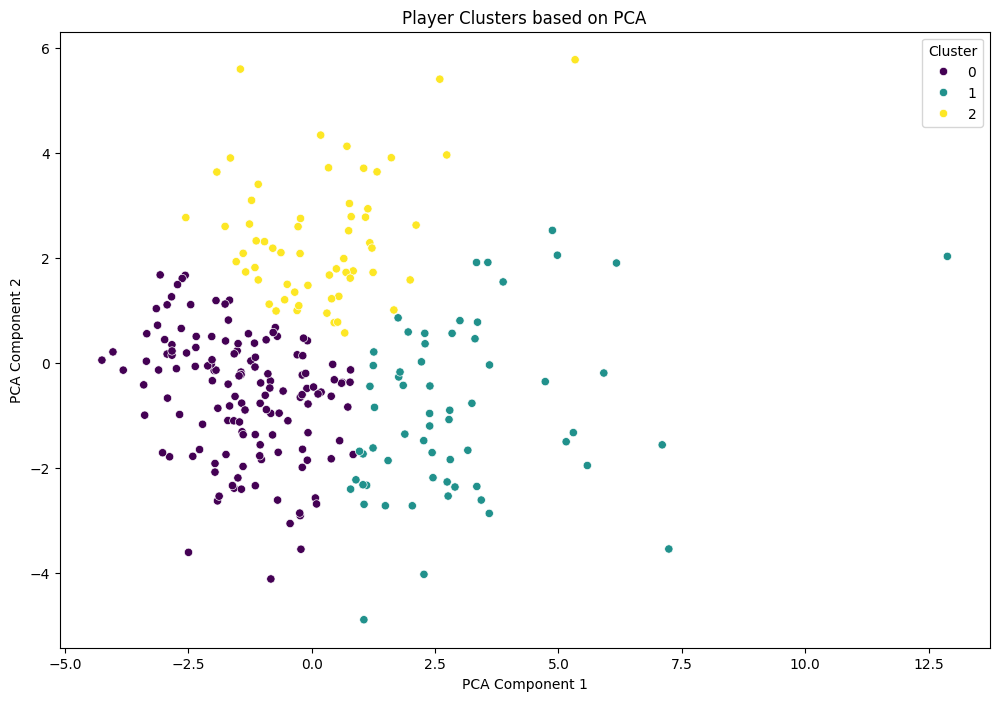

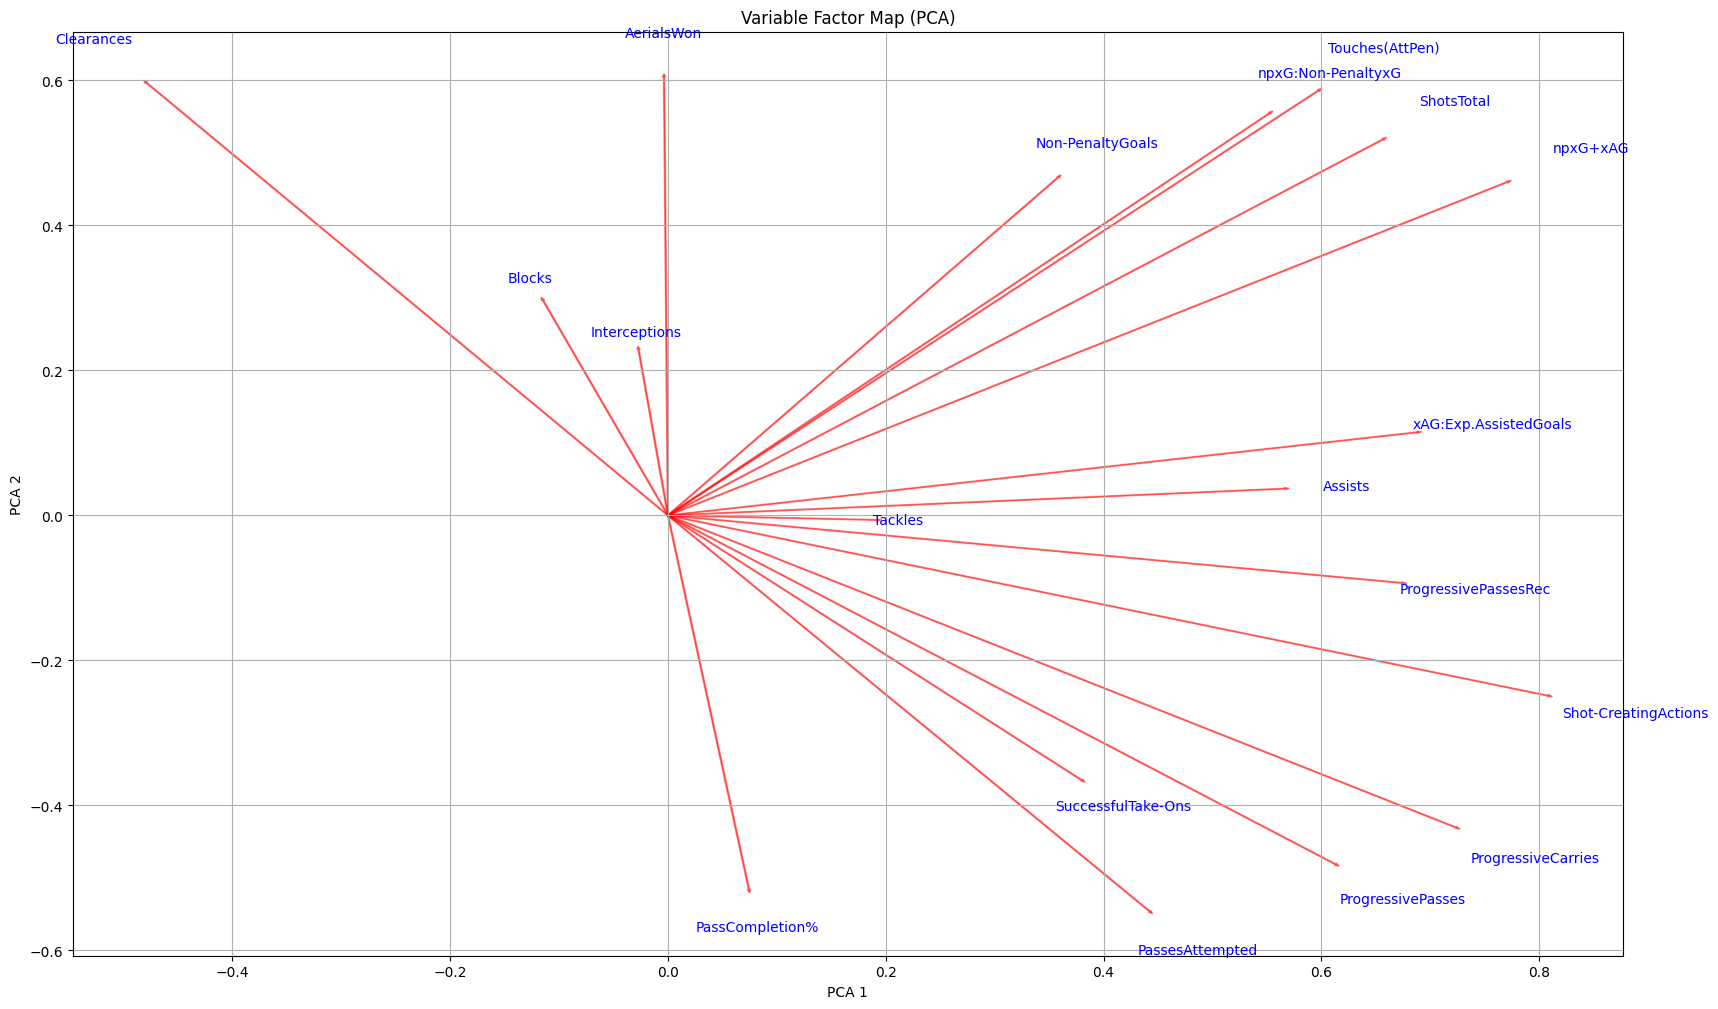

In [20]:
cb_df = cluster_and_show_PCA(cb_df, player_features, 3)

In [21]:
cb_style_map = {0: 'Destroyer', 1: 'Builder', 2: 'ExtraFront'}
cb_df = set_style_attribute_to_map(cb_df, cb_style_map)

## Midfielders

C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_result[:, 0]
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Silhouette Score: 0.15594063594724486


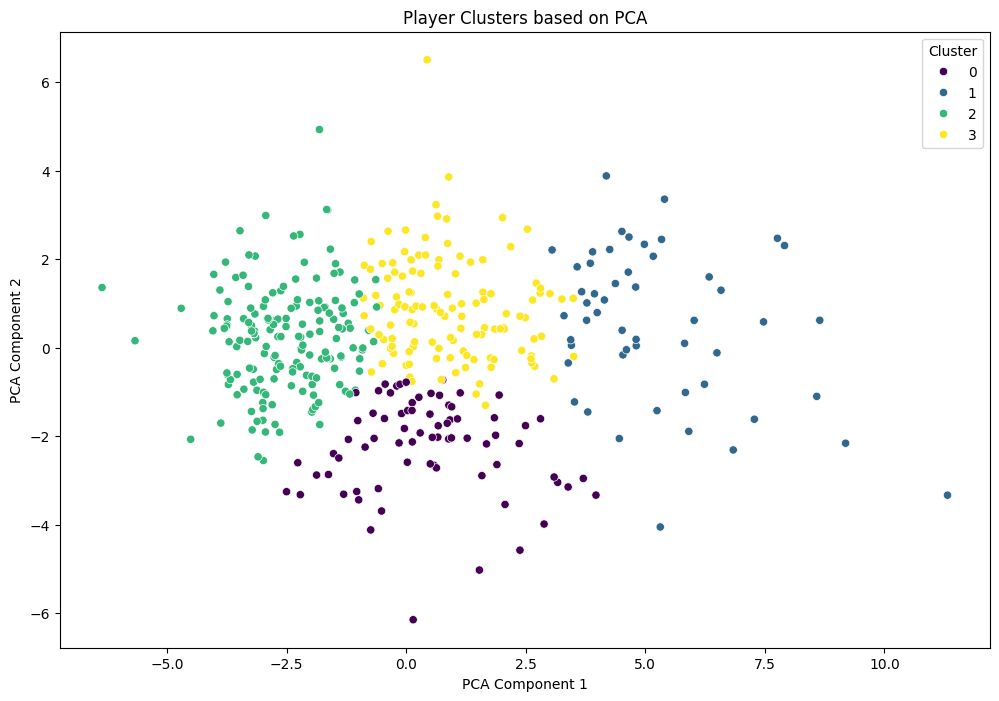

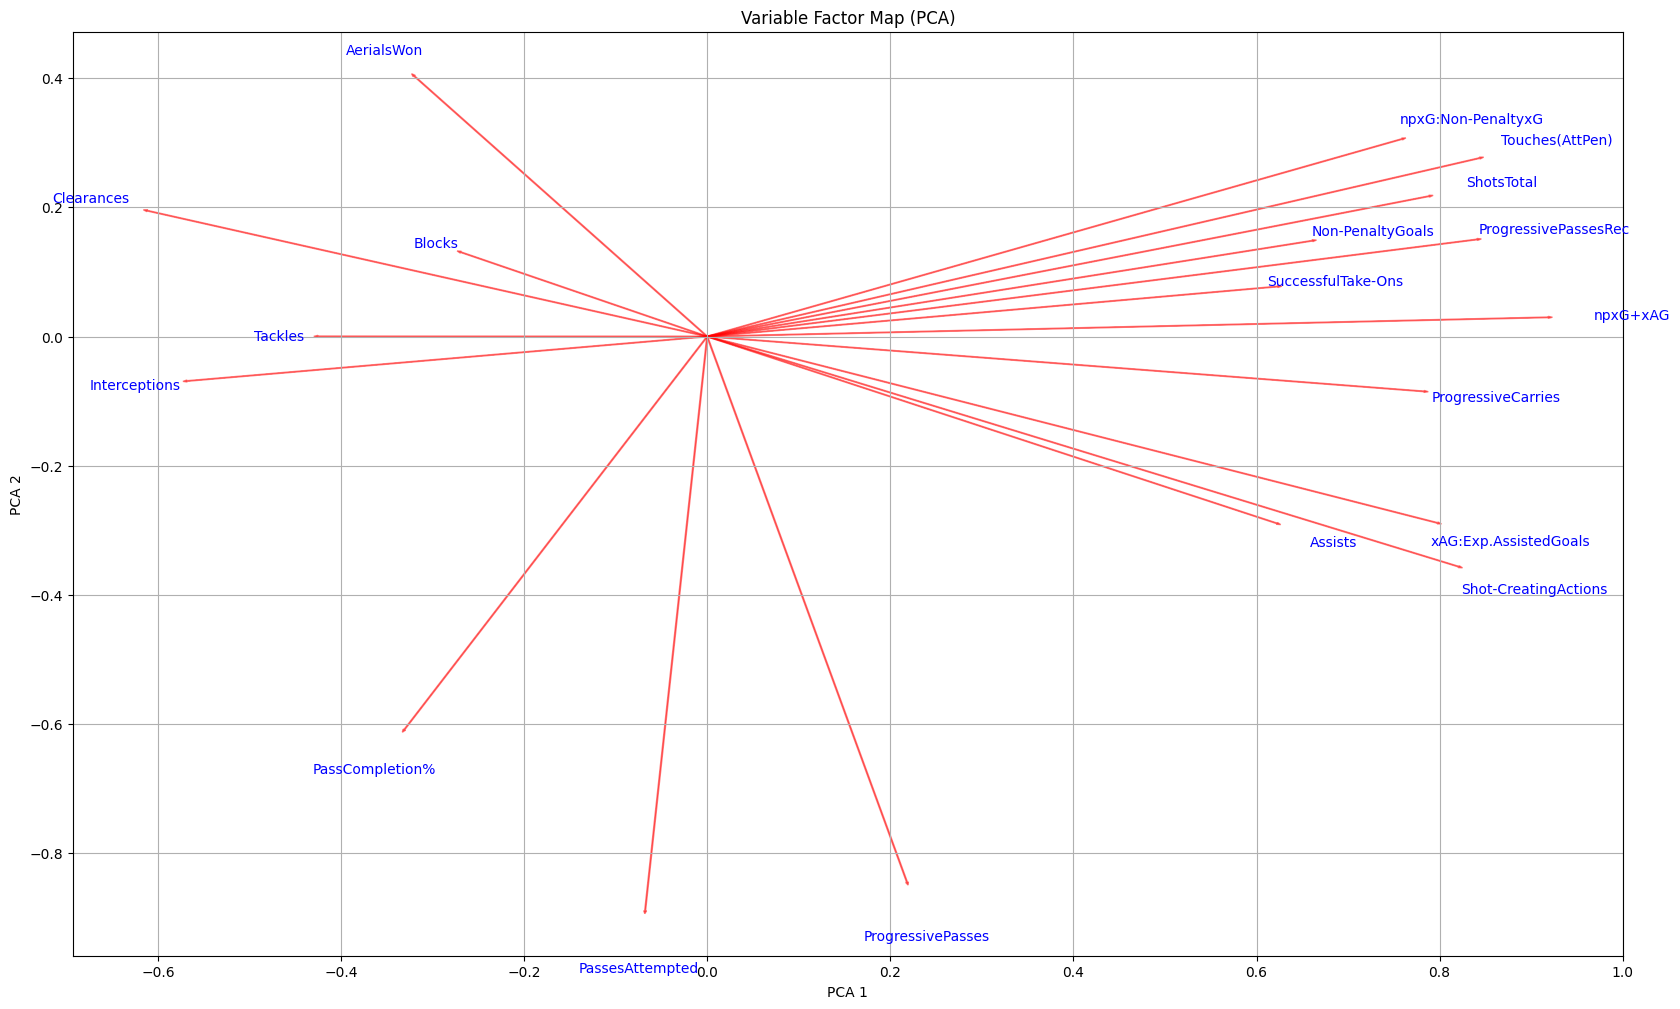

In [22]:
mid_df = cluster_and_show_PCA(mid_df, player_features, 4)

In [45]:
mid_style_map = {0: 'Playmaker', 1: 'Creative', 2: 'BallWinning', 3: 'BoxToBox'}
mid_df = set_style_attribute_to_map(mid_df, mid_style_map)

## Wingers

Silhouette Score: 0.17946080031590567


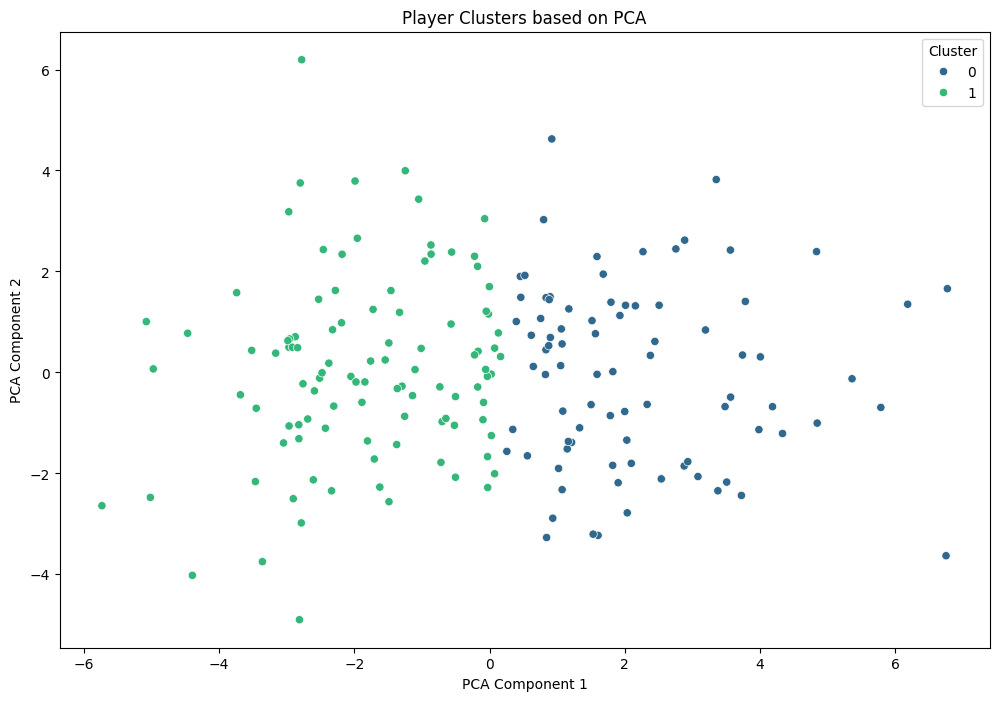

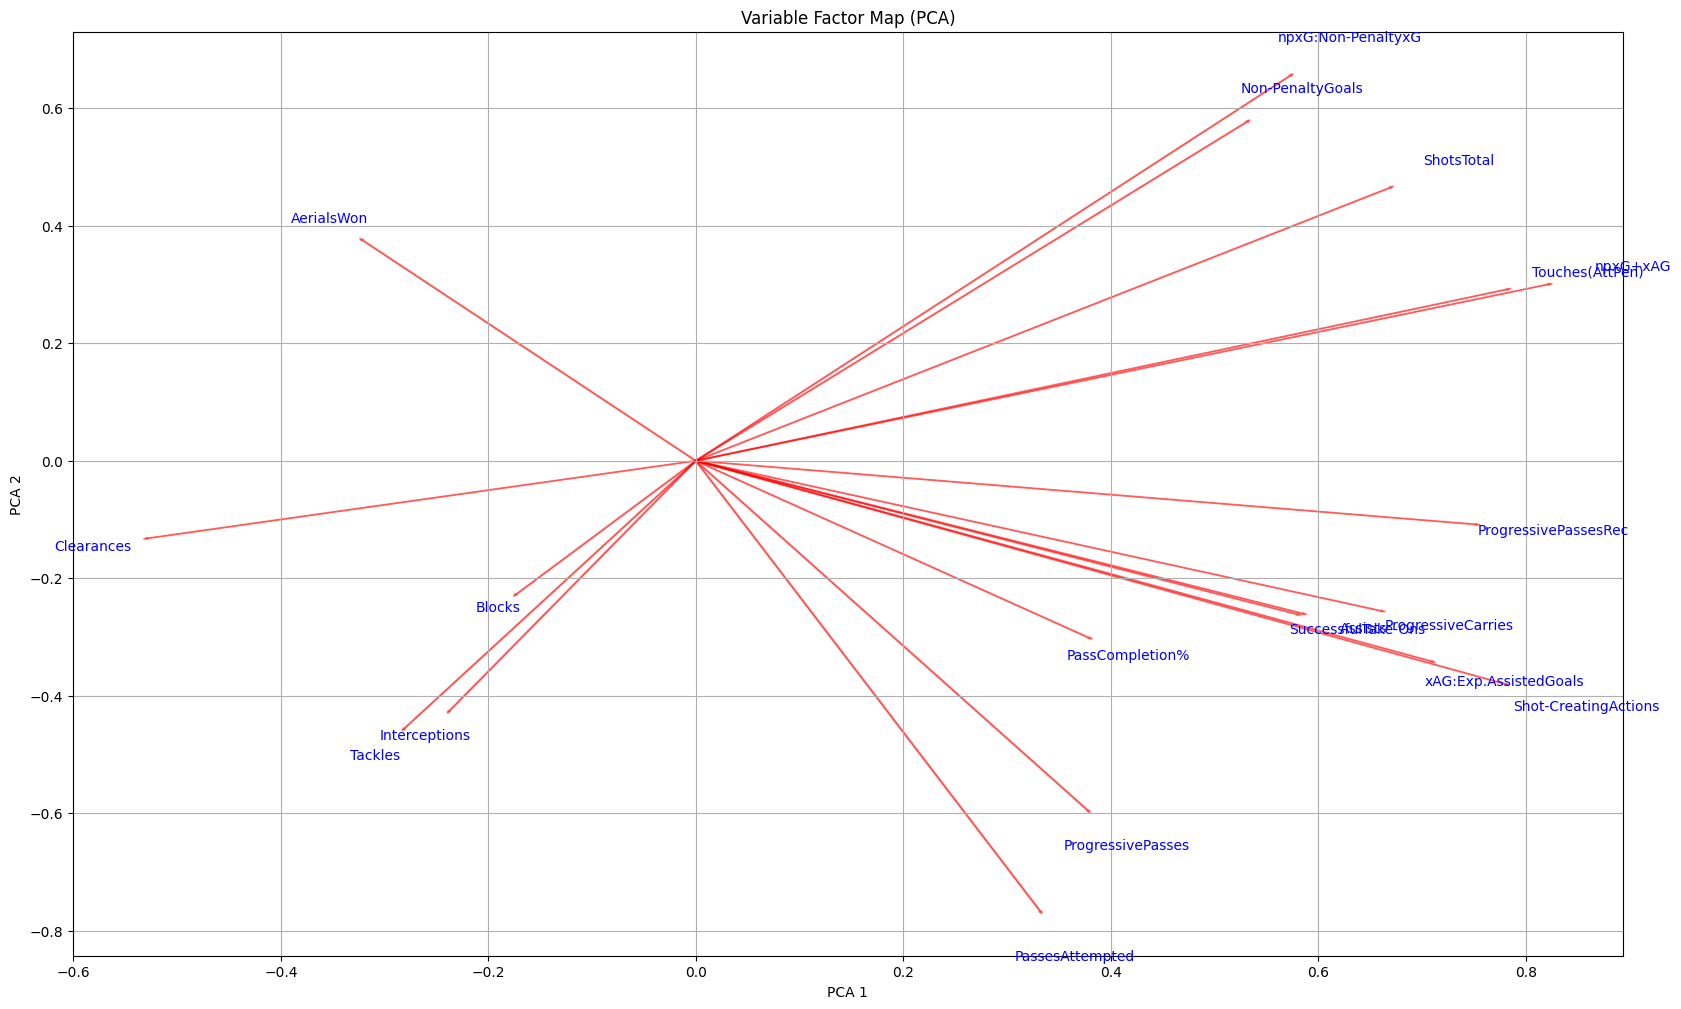

In [50]:
wingers_df = cluster_and_show_PCA(wingers_df, player_features, 2)

In [25]:
wingers_style_map = {0: 'Inverted', 1: 'Wide'}
wingers_df = set_style_attribute_to_map(wingers_df, wingers_style_map)

C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_result[:, 0]
C:\Users\fedep\AppData\Local\Temp\ipykernel_16488\1850099719.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Silhouette Score: 0.15658627697297306


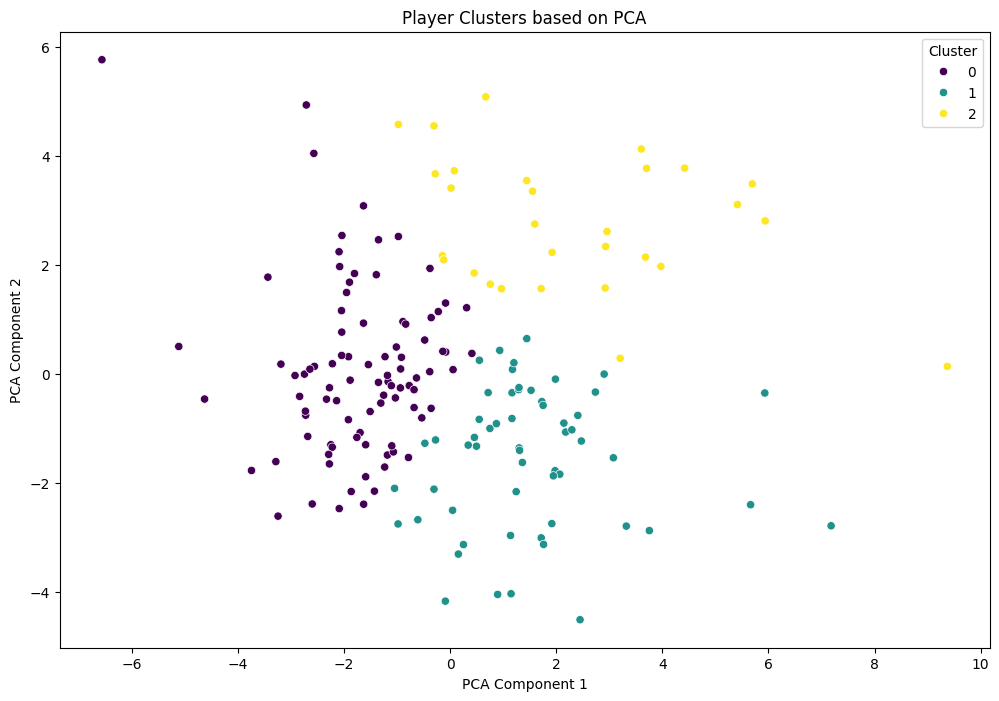

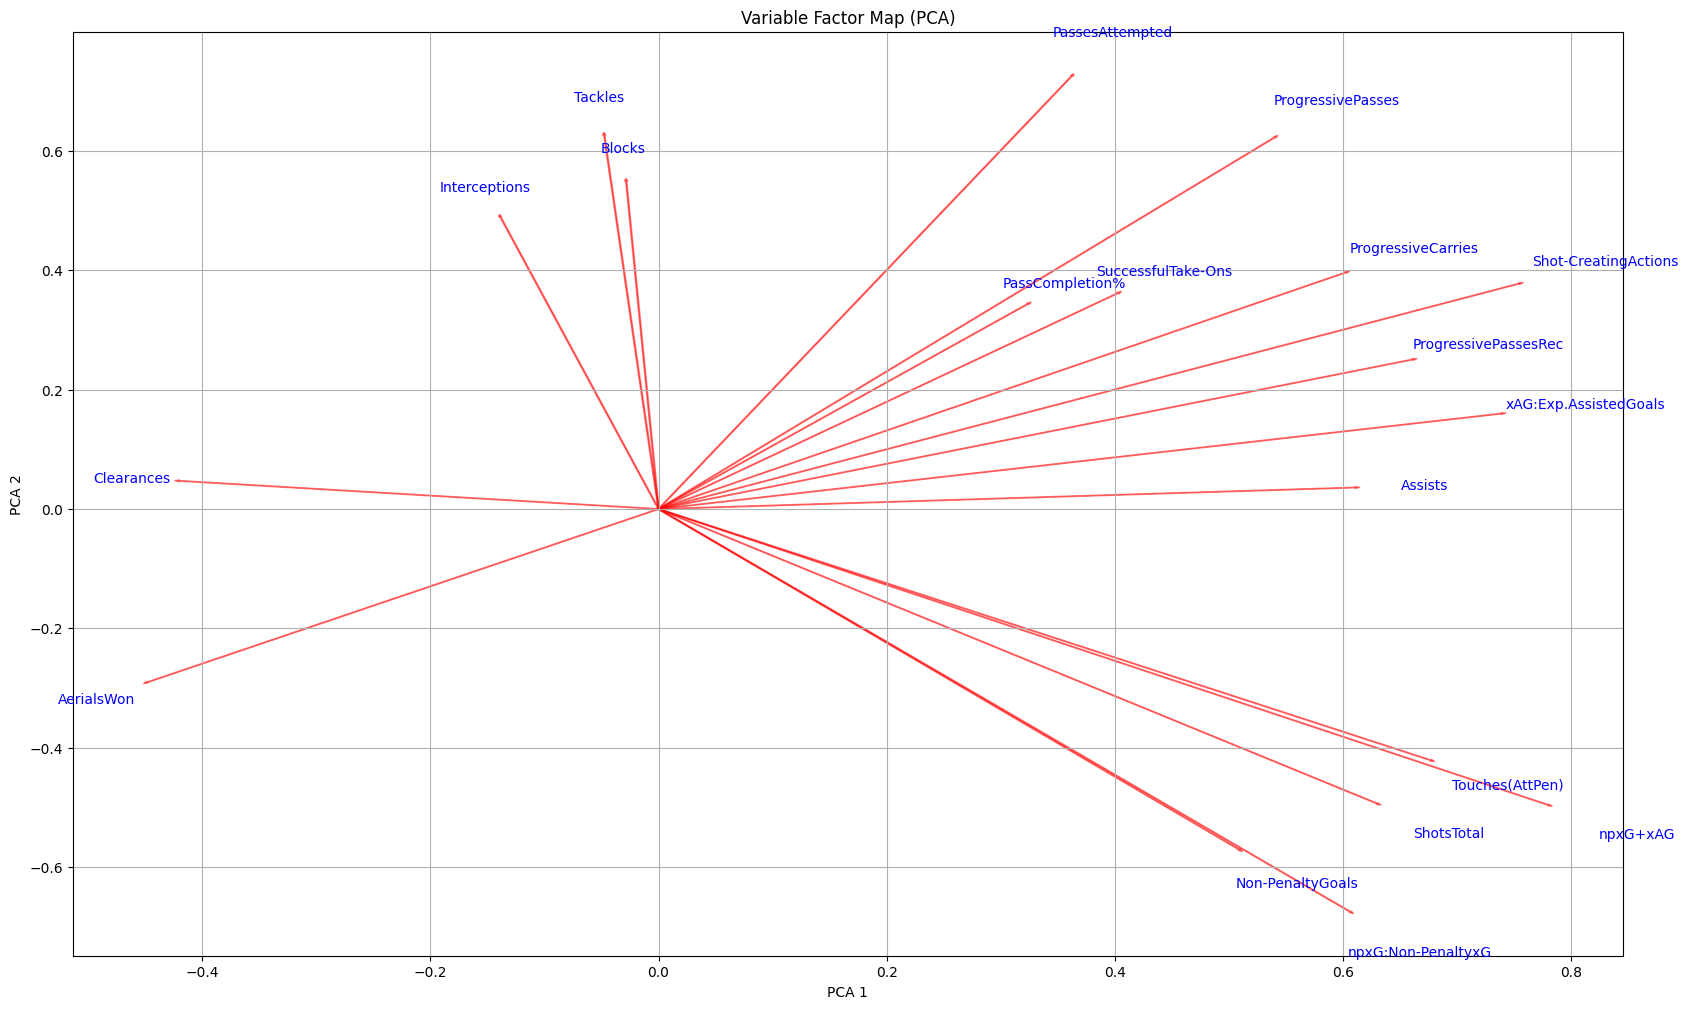

In [26]:
fw_df = cluster_and_show_PCA(fw_df, player_features, 3)

In [27]:
fw_style_map = {0: 'Target', 1: 'Finisher', 2: 'False9'}
fw_df = set_style_attribute_to_map(fw_df, fw_style_map)